In [1]:
# Word2Vec - DRAFT
# The purpose of this exemple is to map words to vectors
# this code is a DRAFT

In [464]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import math
import scipy
import sklearn
from tensorflow.keras import layers, models, optimizers
from tensorflow import train

In [465]:
contents = open("data/The Burgess Animal Book for Children.txt", "r", encoding='utf-8').read()

In [466]:
sentences = contents.lower().replace("\r\n", " ").replace("\r", " ").replace("\n", " ").replace(';', ' ').replace(',', ' ').replace('?', ' ').replace('"', ' ').replace("“", ' ').replace("'", ' ').replace(":", ' ').replace("*", ' ').replace("#", ' ').replace("[", ' ').replace("]", ' ').replace("-", ' ').split(".")

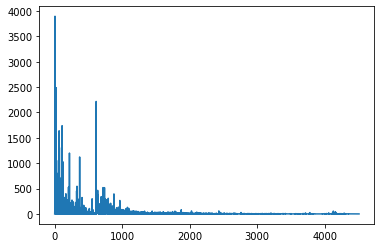

876


In [467]:
# create dictionary
dictionary = []
tmp_dictionary = {}
#words_vector = new array()
for i in range (0, len(sentences)):
    words = sentences[i].split(" ")
    for word in words:
        if len(word.strip()) > 0:
            if word not in tmp_dictionary:
                tmp_dictionary[word] = 0
            tmp_dictionary[word] += 1
            
plt.plot(list(tmp_dictionary.values()))
plt.show()
            
# keep only frequent words occurences
mean = np.mean(list(tmp_dictionary.values()))
stdev = np.std(list(tmp_dictionary.values()))

for word in tmp_dictionary:
    if tmp_dictionary[word] > 10 and len(word) > 1 and not word.isnumeric():
        dictionary.append(word)
        
print(len(dictionary))

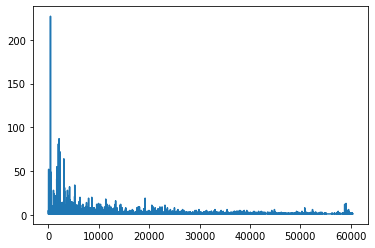

1.128984739647125 - 1.4123152666194232
1227


In [468]:
# get vector dimensions
tmp_vector_dimensions = {}
vector_dimensions = []
for i in range (0, len(sentences)):
    words = sentences[i].split(" ")
    word_m1 = ''
    word_m2 = ''
    for i in range(0, len(words)):
        word = words[i]
        if word in dictionary:
            word_p1 = ''
            word_p2 = ''
            if i < len(words) - 1: word_p1 = words[i + 1]
            if i < len(words) - 2: word_p2 = words[i + 2]
            dimension = word_m2 + "_" + word_m1 + "_XXX_" + word_p1 + "_" + word_p2
            if dimension not in tmp_vector_dimensions:
                tmp_vector_dimensions[dimension] = 0
            tmp_vector_dimensions[dimension] += 1
            word_m2 = word_m1
            word_m1 = word

plt.plot(list(tmp_vector_dimensions.values()))
plt.show()            
            
# keep only frequent dimensions occurences
mean = np.mean(list(tmp_vector_dimensions.values()))
stdev = np.std(list(tmp_vector_dimensions.values()))

print(str(mean) + " - " + str(stdev))

for dimension in tmp_vector_dimensions:
    if tmp_vector_dimensions[dimension] > 2 and tmp_vector_dimensions[dimension] < 2000:
        vector_dimensions.append(dimension)

print(len(vector_dimensions))

In [469]:
# create words vector
words_vector = np.zeros((len(dictionary), len(vector_dimensions)))
words_vector_dict = []

for i in range (0, len(sentences)):
    words = sentences[i].split(" ")
    word_m1 = ''
    word_m2 = ''
    for i in range(0, len(words)):
        word = words[i]
        if word in dictionary:
            word_p1 = ''
            word_p2 = ''
            if i < len(words) - 1: word_p1 = words[i + 1]
            if i < len(words) - 2: word_p2 = words[i + 2]
            dimension = word_m2 + "_" + word_m1 + "_XXX_" + word_p1 + "_" + word_p2
            if dimension in vector_dimensions:
                if word not in words_vector_dict: 
                    words_vector_dict.append(word)
                words_vector[words_vector_dict.index(word), vector_dimensions.index(dimension)] += 1
                word_m2 = word_m1
                word_m1 = word

# remove all empty rows
words_vector = words_vector[~np.all(words_vector == 0, axis=1)]
                
#normalize
words_vector = normalize(words_vector, axis=1, norm='l1')
#pca = PCA(n_components = 10)
#words_vector = pca.fit_transform(words_vector)

In [473]:
print(len(words_vector_dict))
print(len(vector_dimensions))
print(words_vector.shape)
for x in vector_dimensions:
    print(x)

701
1227
(701, 1227)
the_burgess_XXX_book_for
burgess_animal_XXX_for_children
animal_book_XXX_children_
book_for_XXX__by
for_children_XXX_thornton_w
under_the_XXX_of_the
terms_of_XXX_project_gutenberg
with_this_XXX_online_at
__XXX__
__XXX_has_been
of_the_XXX__so
__XXX_of_the
__XXX_the_same
go_to_XXX_to_old
to_school_XXX_old_mother
school_to_XXX_mother_nature
to_old_XXX_nature_
old_mother_XXX__
__XXX_and_jumper
go_to_XXX__
happy_jack_XXX__
_the_XXX_of_the
of_the_XXX__
striped_chipmunk_XXX_his_cousins
chipmunk_and_XXX_cousins_
and_his_XXX__
_and_XXX__
and_the_XXX__
flitter_the_XXX_and_his
__XXX_and_his
his_cousin_XXX__
billy_mink_XXX_little_joe
mink_and_XXX_joe_otter
and_little_XXX_otter_
little_joe_XXX__
pekan_the_XXX__
__XXX_man_coyote
_old_XXX_coyote_and
old_man_XXX_and_howler
howler_the_XXX__
buster_bear_XXX_cousins_
__XXX__billy
the_of_XXX_sea_
the_smiling_XXX__
__XXX_was_quite
__XXX_it_was
__XXX_had_been
__XXX_see_
on_the_XXX_of_the
the_bank_XXX_the_smiling
__XXX__it
the_green_XXX_

In [453]:
# create Neral Network model with 1 hidden layer (will be the weights of word embenddings)
model = models.Sequential()
model.add(layers.Dense(words_vector.shape[1], activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(words_vector.shape[0], activation='softmax'))
model.compile(optimizer=optimizers.Adam(0.01), loss='MSE', metrics=['accuracy'])

In [454]:
# train neural network
# input = words_vector
# output = dictionary
# xxx = middle layer
model.fit(words_vector, np.identity(words_vector.shape[0]), epochs=150, batch_size=32)

Train on 876 samples
Epoch 1/150
876/876 [==============================] - 1s 942us/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 2/150
876/876 [==============================] - 0s 266us/sample - loss: 0.0011 - accuracy: 0.0011
Epoch 3/150
876/876 [==============================] - 0s 249us/sample - loss: 0.0011 - accuracy: 0.0011
Epoch 4/150
876/876 [==============================] - 0s 337us/sample - loss: 0.0011 - accuracy: 0.0034
Epoch 5/150
876/876 [==============================] - 0s 391us/sample - loss: 0.0011 - accuracy: 0.0034
Epoch 6/150
876/876 [==============================] - 0s 392us/sample - loss: 0.0011 - accuracy: 0.0011
Epoch 7/150
876/876 [==============================] - 0s 432us/sample - loss: 0.0011 - accuracy: 0.0034
Epoch 8/150
876/876 [==============================] - 0s 240us/sample - loss: 0.0011 - accuracy: 0.0046
Epoch 9/150
876/876 [==============================] - 0s 353us/sample - loss: 0.0011 - accuracy: 0.0057
Epoch 10/150
876/876 [========

876/876 [==============================] - 0s 211us/sample - loss: 0.0011 - accuracy: 0.0080
Epoch 78/150
876/876 [==============================] - 0s 264us/sample - loss: 0.0011 - accuracy: 0.0080
Epoch 79/150
876/876 [==============================] - 0s 133us/sample - loss: 0.0011 - accuracy: 0.0080
Epoch 80/150
876/876 [==============================] - 0s 105us/sample - loss: 0.0011 - accuracy: 0.0080
Epoch 81/150
876/876 [==============================] - 0s 152us/sample - loss: 0.0011 - accuracy: 0.0068
Epoch 82/150
876/876 [==============================] - 0s 130us/sample - loss: 0.0011 - accuracy: 0.0068
Epoch 83/150
876/876 [==============================] - 0s 135us/sample - loss: 0.0011 - accuracy: 0.0068
Epoch 84/150
876/876 [==============================] - 0s 171us/sample - loss: 0.0011 - accuracy: 0.0068
Epoch 85/150
876/876 [==============================] - 0s 145us/sample - loss: 0.0011 - accuracy: 0.0080
Epoch 86/150
876/876 [==============================] - 0s 

In [455]:
# get middle layer weights
ml_weights = np.array(list(model.layers[2].get_weights()[0])).transpose()
print(ml_weights.shape)

(876, 10)


In [471]:
# redude dimensions to 2D (for display)
pca = PCA(n_components = 2)
vector_2D = pca.fit_transform(words_vector)

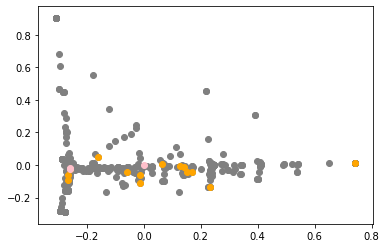

In [472]:
#plot data
plt.scatter(vector_2D[:,0], vector_2D[:,1], c="grey")

# animals group 1 - orange
data_sample = np.zeros((14, 2))
data_sample[0] = vector_2D[words_vector_dict.index("rat")]
data_sample[1] = vector_2D[words_vector_dict.index("rabbit")]
data_sample[2] = vector_2D[words_vector_dict.index("mouse")]
data_sample[3] = vector_2D[words_vector_dict.index("wolf")]
data_sample[4] = vector_2D[words_vector_dict.index("bat")]
data_sample[5] = vector_2D[words_vector_dict.index("deer")]
data_sample[6] = vector_2D[words_vector_dict.index("fox")]
data_sample[7] = vector_2D[words_vector_dict.index("cat")]
data_sample[8] = vector_2D[words_vector_dict.index("dog")]
data_sample[9] = vector_2D[words_vector_dict.index("birds")]
data_sample[10] = vector_2D[words_vector_dict.index("fish")]
data_sample[11] = vector_2D[words_vector_dict.index("seal")]
data_sample[12] = vector_2D[words_vector_dict.index("chipmunk")]
data_sample[13] = vector_2D[words_vector_dict.index("squirrel")]
plt.scatter(data_sample[:,0], data_sample[:,1], c="orange")

# animals group 2 - pink
data_sample = np.zeros((3, 2))
#data_sample[0] = vector_2D[words_vector_dict.index("coyote")]
data_sample[1] = vector_2D[words_vector_dict.index("beaver")]
data_sample[2] = vector_2D[words_vector_dict.index("bighorn")]
plt.scatter(data_sample[:,0], data_sample[:,1], c="pink")

plt.show()

In [458]:
# compute distance matric
dist_matrix = sklearn.metrics.pairwise.euclidean_distances(ml_weights)

In [459]:
xxx = np.argmin(np.where(dist_matrix == 0, 9999, dist_matrix), axis=1)
i = 0;
for x in xxx:
    w1 = dictionary[i]
    w2 = dictionary[x]
    dist = dist_matrix[dictionary.index(w1), dictionary.index(w2)]
    if dist < 10.0:
        print(w1 + " - " + w2 + " - " + str(dist))
    i += 1

project - bank - 0.08767993
gutenberg - chance - 0.1073836
of - to - 1.0004762
the - lightfoot - 0.49090663
burgess - longer - 0.06624792
animal - yesterday - 0.069168076
book - whitish - 0.09363332
for - same - 0.073483974
children - suppose - 0.07347625
by - though - 0.052519254
this - she - 0.251122
is - was - 0.8886756
use - legs - 0.070945255
anywhere - during - 0.07590582
at - not - 0.10087082
no - who - 0.08336561
and - sometimes - 0.61881864
with - same - 0.07083471
almost - simply - 0.06770253
you - was - 0.59043133
may - until - 0.06576323
copy - end - 0.07100499
it - she - 0.5492873
give - soon - 0.09736898
away - chatterer - 0.053962417
or - if - 0.2439552
under - away - 0.07744579
terms - kinds - 0.07776439
license - way - 0.07482177
last - foolish - 0.056885164
set - end - 0.10417507
start - out - 0.086305656
to - of - 1.0004762
cause - owl - 0.09052683
wild - things - 0.07737867
life - related - 0.08987063
in - of - 1.0453879
especially - happy - 0.09321415
many - nests 

In [448]:
dist_matrix[dictionary.index("rat"), dictionary.index("cat")]

3.440634

In [449]:
print(vector_2D[dictionary.index("rat")])
print(vector_2D[dictionary.index("cat")])

[-2.6811767 -0.9702019]
[-1.8736168 -1.4173095]
